In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df=pd.read_csv('/content/car data.csv')

In [3]:
df.head(

)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.value_counts('Seller_Type')

,count
Seller_Type,
Dealer,195
Individual,106


In [10]:
df.value_counts('Fuel_Type')

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [11]:
df.value_counts('Transmission')

,count
Transmission,
Manual,261
Automatic,40


In [27]:
df=df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Transmission':{'Manual':0,'Automatic':1},'Seller_Type':{'Dealer':0,'Individual':1}})

/tmp/ipython-input-476339233.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Transmission':{'Manual':0,'Automatic':1},'Seller_Type':{'Dealer':0,'Individual':1}})


In [28]:
x=df.drop(columns=['Selling_Price','Car_Name'],axis=1)
y=df['Selling_Price']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


In [31]:
print(x)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [32]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [34]:
train_pred=LR.predict(x_train)
error=metrics.r2_score(y_train,train_pred)
print(error)

0.8799451660493711


visualise actual price and predicted

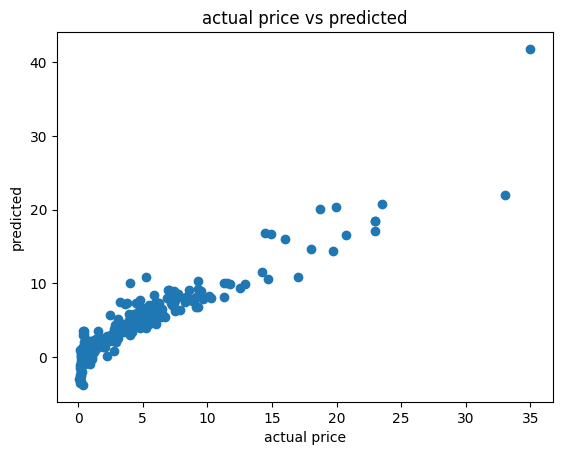

In [35]:
plt.scatter(y_train,train_pred)
plt.xlabel("actual price")
plt.ylabel("predicted")
plt.title("actual price vs predicted")
plt.show()

In [36]:
test_pred=LR.predict(x_test)
error_r2=metrics.r2_score(y_test,test_pred)
print(error_r2)

0.8365766715027051


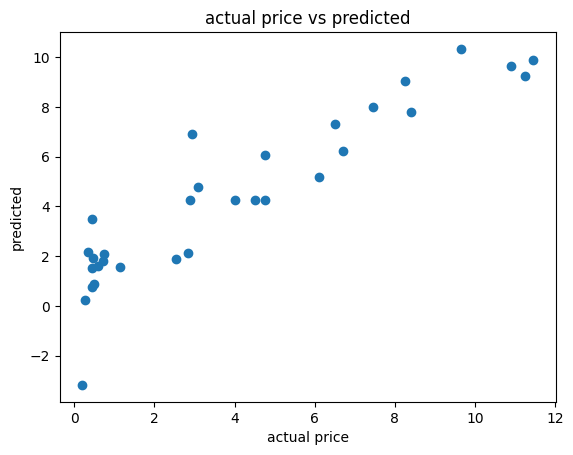

In [37]:
plt.scatter(y_test,test_pred)
plt.xlabel("actual price")
plt.ylabel("predicted")
plt.title("actual price vs predicted")
plt.show()

Lasso Regression


In [43]:
model=Lasso()

In [45]:
model.fit(x_train,y_train)

Lasso()

Testing on training data


In [46]:
train_pred=model.predict(x_train)
score=metrics.r2_score(y_train,train_pred)
print(score)

0.8427856123435794


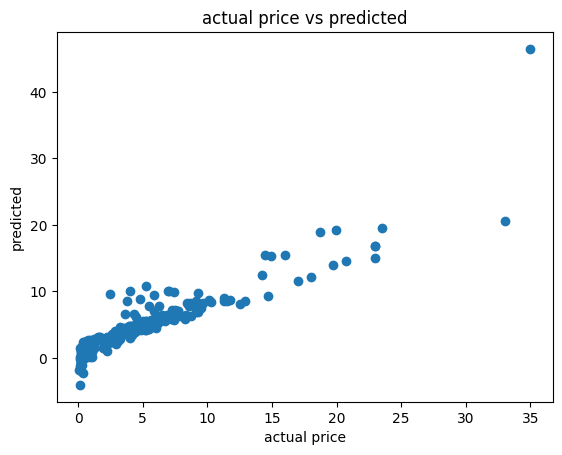

In [47]:
plt.scatter(y_train,train_pred)
plt.xlabel("actual price")
plt.ylabel("predicted")
plt.title("actual price vs predicted")
plt.show()

Testing on test data

In [48]:
test_pred=model.predict(x_test)
error_r2=metrics.r2_score(y_test,test_pred)
print(error_r2)

0.8709167941173195


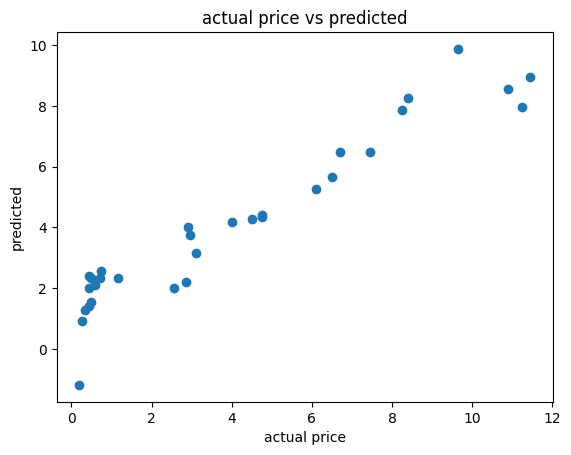

In [49]:
plt.scatter(y_test,test_pred)
plt.xlabel("actual price")
plt.ylabel("predicted")
plt.title("actual price vs predicted")
plt.show()

In [51]:
input=x.iloc[[2]]
prediction=model.predict(input)
print("Actual selling price:", y[[2]])
print("The predicted selling price of car is:", prediction)

Actual selling price: 2    7.25
Name: Selling_Price, dtype: float64
The predicted selling price of car is: [7.16105963]


In [59]:
!git add carPricePred.ipynb

In [61]:
!git commit -m "Updated carPricePred with latest changes"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [63]:
!ls /content



'car data.csv'	'Car details v3.csv'   PracticeProjects   sample_data
